In [1]:
#주로 자주 import하는 전처리기
#from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
%matplotlib inline

#한글 출력
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Users/swany/malgun.ttf").get_name()
rc('font',family=font_name)

In [2]:
#랜덤포레스트
#bagging과 boosting
#bagging은 boostrap aggregating의 준말, 여러 개의 bootstrap자료를 생성하고 결합하여 최종예측모형을 산출한다.
#boosting은 잘못 분류된 개체들에 집중하여 새료운 분류 규칙을 수립한다.
#랜덤 포레스트는 과대적합을 피하기 위해 여러 결정트리를 결합하고,
#서로 다른 방향으로 과대적합한 트리 결과를 평균하여 과대적합을 줄인다.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

forest=RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [6]:
#Random forest vs Decision tree
#절대적으로 유리한 모형은 없다. 데이터, 상황에 따라 적합한 모델을 사용해야 한다.

In [10]:
#Random forest
from sklearn.model_selection import cross_val_score
forest=RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)
print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test,y_test)))

cvscores = cross_val_score(forest,X,y,cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))
      
cvscores = cross_val_score(forest,X,y,cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도: 0.920

테스트 세트 정확도 CV=5: 0.860

테스트 세트 정확도 CV=10: 0.840



In [11]:
#Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

X,y=make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

dt=DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
dt.fit(X_train,y_train)
print("테스트 세트 정확도: {:.3f}\n".format(dt.score(X_test,y_test)))

cvscores = cross_val_score(dt,X,y,cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))
      
cvscores = cross_val_score(dt,X,y,cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도: 0.880

테스트 세트 정확도 CV=5: 0.860

테스트 세트 정확도 CV=10: 0.850



In [14]:
#암 데이터 활용
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트의 정확도: {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트의 정확도: {:.3f}".format(forest.score(X_test,y_test)))

cvscores = cross_val_score(forest,X,y,cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))
print(cvscores)

훈련 세트의 정확도: 1.000
테스트 세트의 정확도: 0.972
테스트 세트 정확도 CV=10: 0.910

[1.  1.  0.8 0.9 1.  1.  0.7 1.  0.9 0.8]


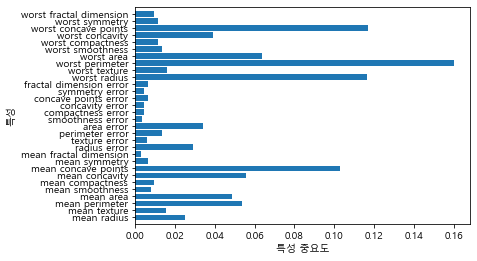

In [16]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    
plot_feature_importances_cancer(forest)